## Working with Pandas

In this section, we'll be using data from the UNHCR (UN Refugee Agency). The UNHCR has collected and published data on refugees, asylum seekers, and other "populations of concern" from 1951-2016; more information can be found at http://popstats.unhcr.org/en/overview.

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
# Reading in the first table

persons = pd.read_csv('UN_refugee_data/unhcr_popstats_export_persons_of_concern_all_data.csv')

C:\Users\Miranda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's look at the data frame to see what's going on.

In [3]:
# Showing top 5 rows

persons.head()

,Extracted from the UNHCR Population Statistics Reference Database,United Nations High Commissioner for Refugees,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Date extracted: 2015-09-18 04:36:55 +02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
3,1951,Australia,Various/Unknown,180000,NaN,NaN,NaN,NaN,NaN,NaN,180000
4,1951,Austria,Various/Unknown,282000,NaN,NaN,NaN,NaN,NaN,NaN,282000


In [4]:
# Showing last 5 rows

persons.tail()

,Extracted from the UNHCR Population Statistics Reference Database,United Nations High Commissioner for Refugees,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
117319,2016,Zimbabwe,Somalia,24,0,0,0,0,0,*,25
117320,2016,Zimbabwe,Syrian Arab Rep.,0,0,0,0,0,0,*,*
117321,2016,Zimbabwe,Uganda,7,0,0,0,0,0,*,8
117322,2016,Zimbabwe,South Africa,*,0,0,0,0,0,7,8
117323,2016,Zimbabwe,Zimbabwe,0,0,0,0,0,0,128,128


In [5]:
# Let's get summary information

persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117324 entries, 0 to 117323
Data columns (total 11 columns):
Extracted from the UNHCR Population Statistics Reference Database    117323 non-null object
United Nations High Commissioner for Refugees                        117322 non-null object
Unnamed: 2                                                           117322 non-null object
Unnamed: 3                                                           101497 non-null object
Unnamed: 4                                                           74630 non-null object
Unnamed: 5                                                           26601 non-null object
Unnamed: 6                                                           20824 non-null object
Unnamed: 7                                                           20622 non-null object
Unnamed: 8                                                           21005 non-null object
Unnamed: 9                                                        

So we see two issues - one is that the header hasn't been assigned properly, and the other is that we have asterisks which we'd like to replace with NaN's (null values).

In [6]:
# Re-read in the data

persons = pd.read_csv('UN_refugee_data/unhcr_popstats_export_persons_of_concern_all_data.csv', header=3, na_values = '*')

In [7]:
# Checking if we resolved the issues

persons.tail()

,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
117316,2016,Zimbabwe,Somalia,24.0,0.0,0.0,0.0,0.0,0.0,NaN,25.0
117317,2016,Zimbabwe,Syrian Arab Rep.,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
117318,2016,Zimbabwe,Uganda,7.0,0.0,0.0,0.0,0.0,0.0,NaN,8.0
117319,2016,Zimbabwe,South Africa,NaN,0.0,0.0,0.0,0.0,0.0,7.0,8.0
117320,2016,Zimbabwe,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,128.0,128.0


In [8]:
persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117321 entries, 0 to 117320
Data columns (total 11 columns):
Year                                        117321 non-null int64
Country / territory of asylum/residence     117321 non-null object
Origin                                      117321 non-null object
Refugees (incl. refugee-like situations)    99442 non-null float64
Asylum-seekers (pending cases)              72604 non-null float64
Returned refugees                           26549 non-null float64
Internally displaced persons (IDPs)         20823 non-null float64
Returned IDPs                               20621 non-null float64
Stateless persons                           21000 non-null float64
Others of concern                           21010 non-null float64
Total Population                            114882 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 9.8+ MB


There are a lot of parameters you can adjust when reading in a CSV file; see the documentation for details: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Some of the column names are long - let's replace them for convenience of analysis.

In [9]:
per_renamed = persons.rename(index=str, columns ={'Country / territory of asylum/residence': 'Residence',
                                    'Refugees (incl. refugee-like situations)': 'Refugees',
                                    'Asylum-seekers (pending cases)': 'Asylum-seekers',
                                    'Internally displaced persons (IDPs)': 'IDPs'})
per_renamed.head()

,Year,Residence,Origin,Refugees,Asylum-seekers,Returned refugees,IDPs,Returned IDPs,Stateless persons,Others of concern,Total Population
0,1951,Australia,Various/Unknown,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,180000.0
1,1951,Austria,Various/Unknown,282000.0,NaN,NaN,NaN,NaN,NaN,NaN,282000.0
2,1951,Belgium,Various/Unknown,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,55000.0
3,1951,Canada,Various/Unknown,168511.0,NaN,NaN,NaN,NaN,NaN,NaN,168511.0
4,1951,Switzerland,Various/Unknown,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,10000.0


How do we look at specific columns?

In [10]:
per_renamed['Origin']

0                 Various/Unknown
1                 Various/Unknown
2                 Various/Unknown
3                 Various/Unknown
4                 Various/Unknown
5                 Various/Unknown
6                 Various/Unknown
7                 Various/Unknown
8                 Various/Unknown
9                 Various/Unknown
10                Various/Unknown
11                Various/Unknown
12                Various/Unknown
13                Various/Unknown
14                Various/Unknown
15                Various/Unknown
16                Various/Unknown
17                Various/Unknown
18                Various/Unknown
19                Various/Unknown
20                Various/Unknown
21                Various/Unknown
22                Various/Unknown
23                Various/Unknown
24                Various/Unknown
25                Various/Unknown
26                Various/Unknown
27                Various/Unknown
28                Various/Unknown
29            

How many countries have refugees and asylum-seekers come from?

In [11]:
# Count unique values in "Residence" column (we'll count "Various/Unknown" as one country)

per_renamed['Origin'].nunique()

222

Let's say we want to focus on persons from Somalia.

In [12]:
somali = per_renamed[per_renamed['Origin'] == 'Somalia']
somali

,Year,Residence,Origin,Refugees,Asylum-seekers,Returned refugees,IDPs,Returned IDPs,Stateless persons,Others of concern,Total Population
1230,1975,Zambia,Somalia,110.0,NaN,NaN,NaN,NaN,NaN,NaN,110.0
1283,1976,Kenya,Somalia,50.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0
1391,1977,Kenya,Somalia,60.0,NaN,NaN,NaN,NaN,NaN,NaN,60.0
1528,1978,Kenya,Somalia,90.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0
1682,1979,Kenya,Somalia,90.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0
1871,1980,Italy,Somalia,34.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1889,1980,Kenya,Somalia,100.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2086,1981,Italy,Somalia,34.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2314,1982,Italy,Somalia,38.0,NaN,NaN,NaN,NaN,NaN,NaN,38.0
2334,1982,Kenya,Somalia,80.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0


Now, let's say we want to be more specific and focus on Somalis who have come to the U.S. between 2000-2016.

In [13]:
somali_us = somali[(somali['Residence'] == 'United States of America') & (somali['Year'] >= 2000) & (somali['Year'] <= 2016)]
somali_us

,Year,Residence,Origin,Refugees,Asylum-seekers,Returned refugees,IDPs,Returned IDPs,Stateless persons,Others of concern,Total Population
26770,2000,United States of America,Somalia,34005.0,1802.0,NaN,NaN,NaN,NaN,NaN,35807.0
31055,2001,United States of America,Somalia,33750.0,1804.0,NaN,NaN,NaN,NaN,NaN,35554.0
35594,2002,United States of America,Somalia,28693.0,1283.0,NaN,NaN,NaN,NaN,NaN,29976.0
40372,2003,United States of America,Somalia,25421.0,1000.0,NaN,NaN,NaN,NaN,NaN,26421.0
45251,2004,United States of America,Somalia,31110.0,812.0,NaN,NaN,NaN,NaN,NaN,31922.0
50333,2005,United States of America,Somalia,34207.0,610.0,NaN,NaN,NaN,NaN,NaN,34817.0
55589,2006,United States of America,Somalia,72546.0,510.0,NaN,NaN,NaN,NaN,NaN,73056.0
61035,2007,United States of America,Somalia,12224.0,305.0,NaN,NaN,NaN,NaN,NaN,12529.0
66573,2008,United States of America,Somalia,10154.0,223.0,NaN,NaN,NaN,NaN,NaN,10377.0
72166,2009,United States of America,Somalia,7112.0,158.0,NaN,NaN,NaN,NaN,NaN,7270.0


We can create a plot to look at the numeric data over time.

In [14]:
# Selecting the population-data columns that do not have null values

pops = somali_us.select_dtypes(include=['float'])
pop_nonnull = pops.dropna(axis=1, how='any')
pop_nonnull.columns

Index(['Refugees', 'Asylum-seekers', 'Total Population'], dtype='object')

C:\Users\Miranda\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,1,'Somali-to-U.S.')

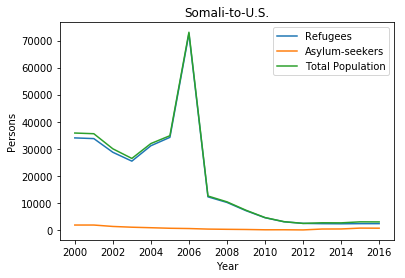

In [15]:
# Plotting the time series

pl = somali_us.plot(x='Year', y=pop_nonnull.columns)
pl.set_ylabel('Persons')
pl.set_title('Somali-to-U.S.')

Now, let's go back to the larger data frame, per_renamed.

In [16]:
per_renamed.head()

,Year,Residence,Origin,Refugees,Asylum-seekers,Returned refugees,IDPs,Returned IDPs,Stateless persons,Others of concern,Total Population
0,1951,Australia,Various/Unknown,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,180000.0
1,1951,Austria,Various/Unknown,282000.0,NaN,NaN,NaN,NaN,NaN,NaN,282000.0
2,1951,Belgium,Various/Unknown,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,55000.0
3,1951,Canada,Various/Unknown,168511.0,NaN,NaN,NaN,NaN,NaN,NaN,168511.0
4,1951,Switzerland,Various/Unknown,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,10000.0


You may have noticed the index on the leftmost side of the data frame. If we don't assign the index when we read in the data, pandas will automatically assign the row number as the index. But for faster and more convenient look-ups, you will often want to assign one of your columns as the index.

In [17]:
# Let's set "Origin" as our new index and sort the countries alphabetically

origin_df = per_renamed.set_index('Origin').sort_index()
origin_df

,Year,Residence,Refugees,Asylum-seekers,Returned refugees,IDPs,Returned IDPs,Stateless persons,Others of concern,Total Population
Origin,,,,,,,,,,
Afghanistan,2008,Ukraine,1156.0,454.0,1.0,NaN,NaN,NaN,NaN,1611.0
Afghanistan,1995,Canada,4575.0,NaN,NaN,NaN,NaN,NaN,NaN,4575.0
Afghanistan,2016,Slovakia,287.0,0.0,0.0,0.0,0.0,0.0,0.0,287.0
Afghanistan,1992,Sweden,556.0,NaN,NaN,NaN,NaN,NaN,NaN,556.0
Afghanistan,2003,Ireland,38.0,22.0,1.0,NaN,NaN,NaN,NaN,61.0
Afghanistan,2011,Denmark,3108.0,160.0,NaN,NaN,NaN,NaN,NaN,3268.0
Afghanistan,2005,Russian Federation,1294.0,225.0,183.0,NaN,NaN,NaN,100000.0,101702.0
Afghanistan,1998,Norway,158.0,NaN,NaN,NaN,NaN,NaN,NaN,158.0
Afghanistan,2003,India,10283.0,88.0,192.0,NaN,NaN,NaN,NaN,10563.0


This is convenient, because now we can more quickly access certain rows and columns, like so:

In [18]:
# Choosing rows corresponding to the slice between Somalia and Sudan (inclusive), and the first four columns

origin_df.loc['Somalia':'Sudan', 'Year':'Asylum-seekers']

,Year,Residence,Refugees,Asylum-seekers
Origin,,,,
Somalia,2013,Slovenia,23.0,0.0
Somalia,1985,Italy,40.0,NaN
Somalia,2013,Thailand,72.0,83.0
Somalia,2013,Saudi Arabia,20.0,19.0
Somalia,2005,Austria,146.0,NaN
Somalia,2005,Bulgaria,115.0,2.0
Somalia,2013,United States of America,2310.0,329.0
Somalia,1985,Kenya,90.0,NaN
Somalia,2013,Rwanda,3.0,1.0


If you wanted to locate data by row/column numbers, you could use .iloc (integer-based location) instead of .loc (label-based location).

In [19]:
origin_df.iloc[0, 0:4]

Year                 2008
Residence         Ukraine
Refugees             1156
Asylum-seekers        454
Name: Afghanistan, dtype: object

Now, as we've alluded to previously, there are a lot of null values in this table.

In [20]:
# Quick way to check if there are any null values in each column

pd.isnull(origin_df).any()

Year                 False
Residence            False
Refugees              True
Asylum-seekers        True
Returned refugees     True
IDPs                  True
Returned IDPs         True
Stateless persons     True
Others of concern     True
Total Population      True
dtype: bool

In [21]:
# Are there columns with ONLY null values?

pd.isnull(origin_df).all()

Year                 False
Residence            False
Refugees             False
Asylum-seekers       False
Returned refugees    False
IDPs                 False
Returned IDPs        False
Stateless persons    False
Others of concern    False
Total Population     False
dtype: bool

In [22]:
# Which rows have null values?

origin_df[pd.isnull(origin_df).any(axis=1)].head(10)    # only want to look at the top 10 rows to save space

,Year,Residence,Refugees,Asylum-seekers,Returned refugees,IDPs,Returned IDPs,Stateless persons,Others of concern,Total Population
Origin,,,,,,,,,,
Afghanistan,2008,Ukraine,1156.0,454.0,1.0,NaN,NaN,NaN,NaN,1611.0
Afghanistan,1995,Canada,4575.0,NaN,NaN,NaN,NaN,NaN,NaN,4575.0
Afghanistan,1992,Sweden,556.0,NaN,NaN,NaN,NaN,NaN,NaN,556.0
Afghanistan,2003,Ireland,38.0,22.0,1.0,NaN,NaN,NaN,NaN,61.0
Afghanistan,2011,Denmark,3108.0,160.0,NaN,NaN,NaN,NaN,NaN,3268.0
Afghanistan,2005,Russian Federation,1294.0,225.0,183.0,NaN,NaN,NaN,100000.0,101702.0
Afghanistan,1998,Norway,158.0,NaN,NaN,NaN,NaN,NaN,NaN,158.0
Afghanistan,2003,India,10283.0,88.0,192.0,NaN,NaN,NaN,NaN,10563.0
Afghanistan,1983,United Arab Emirates,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,1500.0


In [23]:
# Which rows do NOT have null values?

origin_df[pd.notnull(origin_df).all(axis=1)].head(10)

,Year,Residence,Refugees,Asylum-seekers,Returned refugees,IDPs,Returned IDPs,Stateless persons,Others of concern,Total Population
Origin,,,,,,,,,,
Afghanistan,2016,Slovakia,287.0,0.0,0.0,0.0,0.0,0.0,0.0,287.0
Afghanistan,2014,Georgia,3.0,10.0,0.0,0.0,0.0,0.0,0.0,13.0
Afghanistan,2015,Greece,5223.0,587.0,0.0,0.0,0.0,0.0,0.0,5810.0
Afghanistan,2016,Iraq,11.0,133.0,0.0,0.0,0.0,0.0,0.0,144.0
Afghanistan,2014,"China, Hong Kong SAR",3.0,6.0,0.0,0.0,0.0,0.0,0.0,9.0
Afghanistan,2015,Georgia,3.0,7.0,0.0,0.0,0.0,0.0,0.0,10.0
Afghanistan,2014,Greece,1451.0,774.0,0.0,0.0,0.0,0.0,0.0,2225.0
Afghanistan,2016,Switzerland,5675.0,7761.0,0.0,0.0,0.0,0.0,0.0,13436.0
Afghanistan,2015,Hungary,942.0,8469.0,0.0,0.0,0.0,0.0,0.0,9411.0


There are several ways you might want to handle missing values, depending on your data and application. One way is to simply drop rows or columns with null values:

In [24]:
# Dropping rows with NaN's in "Refugees" or "IDPs" columns

origin_df_nonnull = origin_df.dropna(axis=0, how='any', subset=['Refugees', 'IDPs'])
origin_df_nonnull.head(10)

,Year,Residence,Refugees,Asylum-seekers,Returned refugees,IDPs,Returned IDPs,Stateless persons,Others of concern,Total Population
Origin,,,,,,,,,,
Afghanistan,2016,Slovakia,287.0,0.0,0.0,0.0,0.0,0.0,0.0,287.0
Afghanistan,2014,Georgia,3.0,10.0,0.0,0.0,0.0,0.0,0.0,13.0
Afghanistan,2015,Greece,5223.0,587.0,0.0,0.0,0.0,0.0,0.0,5810.0
Afghanistan,2016,Iraq,11.0,133.0,0.0,0.0,0.0,0.0,0.0,144.0
Afghanistan,2014,"China, Hong Kong SAR",3.0,6.0,0.0,0.0,0.0,0.0,0.0,9.0
Afghanistan,2015,Georgia,3.0,7.0,0.0,0.0,0.0,0.0,0.0,10.0
Afghanistan,2014,Greece,1451.0,774.0,0.0,0.0,0.0,0.0,0.0,2225.0
Afghanistan,2016,Switzerland,5675.0,7761.0,0.0,0.0,0.0,0.0,0.0,13436.0
Afghanistan,2015,Hungary,942.0,8469.0,0.0,0.0,0.0,0.0,0.0,9411.0


However, sometimes dropping columns isn't feasible or desirable. You may instead want to impute missing values, replacing them with values that make sense in the context. 

Let's say we want to replace each NaN with the average value in its respective column.

In [50]:
%time
# First, calculate the mean for each column (this may take a few seconds)

means = origin_df.mean(axis=0)

Wall time: 0 ns


In [51]:
means

Year                  2005.595921
Refugees              5324.699141
Asylum-seekers         283.097019
Returned refugees     1169.386305
IDPs                 14359.218124
Returned IDPs         1517.662432
Stateless persons     2375.331333
Others of concern      934.576916
Total Population      8538.476628
dtype: float64

In [27]:
# Now, replace the NaN's

origin_df.fillna(means).head(10)

,Year,Residence,Refugees,Asylum-seekers,Returned refugees,IDPs,Returned IDPs,Stateless persons,Others of concern,Total Population
Origin,,,,,,,,,,
Afghanistan,2008,Ukraine,1156.0,454.000000,1.000000,14359.218124,1517.662432,2375.331333,934.576916,1611.0
Afghanistan,1995,Canada,4575.0,283.097019,1169.386305,14359.218124,1517.662432,2375.331333,934.576916,4575.0
Afghanistan,2016,Slovakia,287.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,287.0
Afghanistan,1992,Sweden,556.0,283.097019,1169.386305,14359.218124,1517.662432,2375.331333,934.576916,556.0
Afghanistan,2003,Ireland,38.0,22.000000,1.000000,14359.218124,1517.662432,2375.331333,934.576916,61.0
Afghanistan,2011,Denmark,3108.0,160.000000,1169.386305,14359.218124,1517.662432,2375.331333,934.576916,3268.0
Afghanistan,2005,Russian Federation,1294.0,225.000000,183.000000,14359.218124,1517.662432,2375.331333,100000.000000,101702.0
Afghanistan,1998,Norway,158.0,283.097019,1169.386305,14359.218124,1517.662432,2375.331333,934.576916,158.0
Afghanistan,2003,India,10283.0,88.000000,192.000000,14359.218124,1517.662432,2375.331333,934.576916,10563.0


Alternatively, you might want to replace null values with zeros.

In [28]:
origin_df.fillna(0).head(10)

,Year,Residence,Refugees,Asylum-seekers,Returned refugees,IDPs,Returned IDPs,Stateless persons,Others of concern,Total Population
Origin,,,,,,,,,,
Afghanistan,2008,Ukraine,1156.0,454.0,1.0,0.0,0.0,0.0,0.0,1611.0
Afghanistan,1995,Canada,4575.0,0.0,0.0,0.0,0.0,0.0,0.0,4575.0
Afghanistan,2016,Slovakia,287.0,0.0,0.0,0.0,0.0,0.0,0.0,287.0
Afghanistan,1992,Sweden,556.0,0.0,0.0,0.0,0.0,0.0,0.0,556.0
Afghanistan,2003,Ireland,38.0,22.0,1.0,0.0,0.0,0.0,0.0,61.0
Afghanistan,2011,Denmark,3108.0,160.0,0.0,0.0,0.0,0.0,0.0,3268.0
Afghanistan,2005,Russian Federation,1294.0,225.0,183.0,0.0,0.0,0.0,100000.0,101702.0
Afghanistan,1998,Norway,158.0,0.0,0.0,0.0,0.0,0.0,0.0,158.0
Afghanistan,2003,India,10283.0,88.0,192.0,0.0,0.0,0.0,0.0,10563.0


Let's look at some operations we can do in pandas.

In [29]:
# Adding a new column representing the sum of "Refugees" and "Returned refugees" to per_renamed, the non-index-specified
# dataframe (treating NaNs as zeros for the calculation)

per_renamed['All refugees'] = per_renamed['Refugees'] + per_renamed['Returned refugees'].fillna(0)
per_renamed

,Year,Residence,Origin,Refugees,Asylum-seekers,Returned refugees,IDPs,Returned IDPs,Stateless persons,Others of concern,Total Population,All refugees
0,1951,Australia,Various/Unknown,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,180000.0,180000.0
1,1951,Austria,Various/Unknown,282000.0,NaN,NaN,NaN,NaN,NaN,NaN,282000.0,282000.0
2,1951,Belgium,Various/Unknown,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,55000.0,55000.0
3,1951,Canada,Various/Unknown,168511.0,NaN,NaN,NaN,NaN,NaN,NaN,168511.0,168511.0
4,1951,Switzerland,Various/Unknown,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,10000.0
5,1951,Germany,Various/Unknown,265000.0,NaN,NaN,NaN,NaN,NaN,NaN,265000.0,265000.0
6,1951,Denmark,Various/Unknown,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,2000.0
7,1951,Spain,Various/Unknown,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,2000.0
8,1951,France,Various/Unknown,290000.0,NaN,NaN,NaN,NaN,NaN,NaN,290000.0,290000.0
9,1951,United Kingdom,Various/Unknown,208000.0,NaN,NaN,NaN,NaN,NaN,NaN,208000.0,208000.0


What if we want to look at the total number of refugees (not Returned) from each country in "Origin" by year? The easiest way to do this is by grouping the data.

In [30]:
# Grouping data by Origin and Year, then calculating totals

grouped_total = per_renamed.groupby(['Origin','Year'])['Refugees'].sum()
grouped_total

Origin       Year
Afghanistan  1979     500000.0
             1980    1734921.0
             1981    3879984.0
             1982    4488214.0
             1983    4712735.0
             1984    4417651.0
             1985    4653193.0
             1986    5094283.0
             1987    5511740.0
             1988    5622982.0
             1989    5643989.0
             1990    6339095.0
             1991    6306301.0
             1992    4552153.0
             1993    3374576.0
             1994    2731169.0
             1995    2679133.0
             1996    2674236.0
             1997    2676674.0
             1998    2667115.0
             1999    2601691.0
             2000    3587336.0
             2001    3809767.0
             2002    2510294.0
             2003    2136043.0
             2004    2414468.0
             2005    2166149.0
             2006    2107519.0
             2007    3057661.0
             2008    2833128.0
                       ...    
Zimbabwe     1987    

What if we want to find out which country "produced" (for lack of a better word) the most refugees, by year?

In [31]:
# First, group and sum over each group

grouped_new = per_renamed.groupby(['Year', 'Origin'])['Refugees'].sum()
grouped_new

Year  Origin                                   
1951  Various/Unknown                              1957211.0
1952  Various/Unknown                              1787928.0
1953  Various/Unknown                              1679304.0
1954  Various/Unknown                              1581628.0
1955  Various/Unknown                              1547066.0
1956  Various/Unknown                              1600875.0
1957  Various/Unknown                              1582814.0
1958  Various/Unknown                              1545310.0
1959  Various/Unknown                              1520185.0
1960  Angola                                        150000.0
      Various/Unknown                              1354664.0
1961  Angola                                        150000.0
      Ghana                                           5000.0
      Rwanda                                        147000.0
      Various/Unknown                              1339867.0
1962  Angola                         

In [32]:
# We can use the DataFrame.unstack() method to pivot the years to columns

unstacked = grouped_new.unstack(level=0)
unstacked

Year,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Origin,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3057661.0,2833128.0,2887123.0,3054709.0,2664436.0,2586152.0,2556502.0,2596270.0,2666305.0,2501410.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15340.0,15006.0,15711.0,14772.0,13551.0,12568.0,10103.0,10158.0,10408.0,11050.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10615.0,9060.0,8185.0,6689.0,6121.0,5677.0,3660.0,3524.0,3490.0,3675.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,6.0,6.0,6.0,6.0,7.0,5.0,7.0,5.0,0.0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150000.0,...,186155.0,171393.0,141021.0,134858.0,128664.0,19258.0,10286.0,9484.0,11869.0,8363.0
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.0,26.0,28.0,30.0,32.0,45.0,49.0,53.0,56.0,77.0
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1171.0,1047.0,608.0,557.0,518.0,447.0,388.0,318.0,194.0,115.0


In [33]:
# Finally, use the DataFrame.idxmax() method to return the indices corresponding to the maximum value for each column

max_origin = unstacked.idxmax(axis=0)
max_origin

Year
1951     Various/Unknown
1952     Various/Unknown
1953     Various/Unknown
1954     Various/Unknown
1955     Various/Unknown
1956     Various/Unknown
1957     Various/Unknown
1958     Various/Unknown
1959     Various/Unknown
1960     Various/Unknown
1961     Various/Unknown
1962     Various/Unknown
1963     Various/Unknown
1964     Various/Unknown
1965               China
1966               China
1967     Various/Unknown
1968     Various/Unknown
1969     Various/Unknown
1970     Various/Unknown
1971     Various/Unknown
1972     Various/Unknown
1973     Various/Unknown
1974     Various/Unknown
1975     Various/Unknown
1976     Various/Unknown
1977     Various/Unknown
1978     Various/Unknown
1979     Various/Unknown
1980            Ethiopia
              ...       
1987         Afghanistan
1988         Afghanistan
1989         Afghanistan
1990         Afghanistan
1991         Afghanistan
1992         Afghanistan
1993         Afghanistan
1994         Afghanistan
1995         Afghani

To visualize this, let's use the visualization library Seaborn.

In [34]:
import seaborn as sns

In [35]:
# Resetting "Year" to be a column for easier plotting, and renaming the country column label from the assigned "0" to Country

max_origin_new = max_origin.reset_index()
max_origin_df = max_origin_new.rename(index=str, columns={0: 'Country'})
max_origin_df.head()

,Year,Country
0,1951,Various/Unknown
1,1952,Various/Unknown
2,1953,Various/Unknown
3,1954,Various/Unknown
4,1955,Various/Unknown


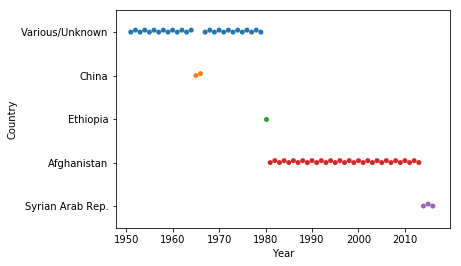

In [36]:
# Swarm plot showing which country produced the most refugees by year

sns.swarmplot(x='Year', y='Country', data=max_origin_df)

The last thing we'll look at is merging two tables together. Another table provided by the UNHCR is a table providing the number of resettlement arrivals for each Residence/Origin country pair between 1959-2016.

In [37]:
# Reading in resettlement table
 
resettle = pd.read_csv('UN_refugee_data/unhcr_popstats_export_resettlement_all_data.csv', header=3, na_values = '*')
resettle.head()

,Country / territory of asylum/residence,Origin,Year,Value
0,Canada,Albania,1959,17.0
1,Canada,Austria,1959,17.0
2,Canada,Belgium,1959,2.0
3,Canada,Bulgaria,1959,35.0
4,Canada,China,1959,2.0


How can we merge this data with the persons-of-concern data?

First, let's rename the Residence column to match the naming convention in the per_renamed data frame.

In [38]:
# Also, rename "Value" to "Resettled"

resettle_renamed = resettle.rename(index=str, columns ={'Country / territory of asylum/residence': 'Residence',
                                                        'Value': 'Resettled'})
resettle_renamed.head()

,Residence,Origin,Year,Resettled
0,Canada,Albania,1959,17.0
1,Canada,Austria,1959,17.0
2,Canada,Belgium,1959,2.0
3,Canada,Bulgaria,1959,35.0
4,Canada,China,1959,2.0


In [39]:
# Remember per_renamed?

per_renamed.head()

,Year,Residence,Origin,Refugees,Asylum-seekers,Returned refugees,IDPs,Returned IDPs,Stateless persons,Others of concern,Total Population,All refugees
0,1951,Australia,Various/Unknown,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,180000.0,180000.0
1,1951,Austria,Various/Unknown,282000.0,NaN,NaN,NaN,NaN,NaN,NaN,282000.0,282000.0
2,1951,Belgium,Various/Unknown,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,55000.0,55000.0
3,1951,Canada,Various/Unknown,168511.0,NaN,NaN,NaN,NaN,NaN,NaN,168511.0,168511.0
4,1951,Switzerland,Various/Unknown,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,10000.0


It would make sense to merge on the combination of Year, Residence, and Origin. Also, since the resettlement data starts in 1959, we need to think about whether we want to keep the rows in per_renamed corresponding to the years between 1951 and 1959.

In [40]:
# Let's say we want to keep the earlier data

left_join = pd.merge(per_renamed, resettle_renamed, how='left', on = ['Year', 'Residence', 'Origin'])
left_join[left_join['Residence'] == 'Canada']    # focusing on those who resettled in Canada

,Year,Residence,Origin,Refugees,Asylum-seekers,Returned refugees,IDPs,Returned IDPs,Stateless persons,Others of concern,Total Population,All refugees,Resettled
3,1951,Canada,Various/Unknown,168511.0,NaN,NaN,NaN,NaN,NaN,NaN,168511.0,168511.0,NaN
23,1952,Canada,Various/Unknown,154828.0,NaN,NaN,NaN,NaN,NaN,NaN,154828.0,154828.0,NaN
40,1953,Canada,Various/Unknown,107004.0,NaN,NaN,NaN,NaN,NaN,NaN,107004.0,107004.0,NaN
57,1954,Canada,Various/Unknown,75828.0,NaN,NaN,NaN,NaN,NaN,NaN,75828.0,75828.0,NaN
77,1955,Canada,Various/Unknown,52551.0,NaN,NaN,NaN,NaN,NaN,NaN,52551.0,52551.0,NaN
93,1956,Canada,Various/Unknown,17485.0,NaN,NaN,NaN,NaN,NaN,NaN,17485.0,17485.0,NaN
109,1957,Canada,Various/Unknown,46334.0,NaN,NaN,NaN,NaN,NaN,NaN,46334.0,46334.0,NaN
125,1958,Canada,Various/Unknown,46908.0,NaN,NaN,NaN,NaN,NaN,NaN,46908.0,46908.0,NaN
143,1959,Canada,Various/Unknown,47934.0,NaN,NaN,NaN,NaN,NaN,NaN,47934.0,47934.0,NaN
161,1960,Canada,Various/Unknown,48629.0,NaN,NaN,NaN,NaN,NaN,NaN,48629.0,48629.0,NaN


In [41]:
# What if we only want to see the intersections of the two tables (where Year, Residence, and Origin all match up?)

inner_join = pd.merge(per_renamed, resettle_renamed, how='inner', on = ['Year', 'Residence', 'Origin'])
inner_join.head(10)

,Year,Residence,Origin,Refugees,Asylum-seekers,Returned refugees,IDPs,Returned IDPs,Stateless persons,Others of concern,Total Population,All refugees,Resettled
0,1984,United States of America,Lao People's Dem. Rep.,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7291.0
1,1988,United States of America,Afghanistan,12853.0,NaN,NaN,NaN,NaN,NaN,NaN,12853.0,12853.0,2211.0
2,1988,United States of America,Angola,212.0,NaN,NaN,NaN,NaN,NaN,NaN,212.0,212.0,13.0
3,1988,United States of America,Albania,295.0,NaN,NaN,NaN,NaN,NaN,NaN,295.0,295.0,72.0
4,1988,United States of America,Burundi,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
5,1988,United States of America,Bulgaria,745.0,NaN,NaN,NaN,NaN,NaN,NaN,745.0,745.0,140.0
6,1988,United States of America,Dem. Rep. of the Congo,69.0,NaN,NaN,NaN,NaN,NaN,NaN,69.0,69.0,10.0
7,1988,United States of America,Cuba,3863.0,NaN,NaN,NaN,NaN,NaN,NaN,3863.0,3863.0,3006.0
8,1988,United States of America,Czech Rep.,5167.0,NaN,NaN,NaN,NaN,NaN,NaN,5167.0,5167.0,672.0
9,1988,United States of America,Ethiopia,10439.0,NaN,NaN,NaN,NaN,NaN,NaN,10439.0,10439.0,1456.0


Now, let's output this last result to a new CSV file.

In [42]:
# Writing data to new file

filename = 'UN_refugee_data/persons_resettlement_innerjoin.csv'
inner_join.to_csv(filename, index=False)    # we don't want to print out the row number index that pandas assigned
print('Check the UN_refugee_data folder for the new file.')

Check the UN_refugee_data folder for the new file.


**Exercise 2:**

A third table from UNHCR is a demographics table showing the gender and age breakdown on "persons of concern" in each region of a given residence country. Focusing on adults between the ages of 18-59 in the year 2016, determine the proportion of persons who are female in each country of residence, and find the countries which took in less than 25% female persons of concern in that year.

In [43]:
# Reading in demographics data

demographics =  pd.read_csv('UN_refugee_data/unhcr_popstats_export_demographics_all_data.csv', header=3, na_values = '*')

**Answer 2:**

In [44]:
## ENTER CODE HERE

# Looking at the data

demographics.head()

,Year,Country / territory of asylum/residence,Location Name,Female 0-4,Female 5-11,Female 5-17,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 12-17,Male 18-59,Male 60+,M: Unknown,M: Total
0,2001,Afghanistan,Kabul,0.0,NaN,1.0,NaN,1.0,0.0,0.0,2.0,0.0,NaN,0.0,NaN,2.0,0.0,0.0,2.0
1,2001,Afghanistan,Various,14335.0,NaN,45451.0,NaN,99880.0,19234.0,412004.0,590904.0,14716.0,NaN,47522.0,NaN,114965.0,13025.0,435492.0,625720.0
2,2001,Afghanistan,Herat,0.0,NaN,0.0,NaN,1.0,0.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,0.0,0.0,1.0
3,2001,Angola,Viana,484.0,NaN,1687.0,NaN,1282.0,43.0,0.0,3496.0,597.0,NaN,1645.0,NaN,787.0,34.0,0.0,3063.0
4,2001,Angola,Moxico,219.0,NaN,734.0,NaN,427.0,25.0,0.0,1405.0,226.0,NaN,711.0,NaN,139.0,15.0,0.0,1091.0


In [45]:
# Renaming the Residence column and looking at the last few rows

dem_renamed = demographics.rename(index=str, columns ={'Country / territory of asylum/residence': 'Residence'})
dem_renamed.tail()

,Year,Residence,Location Name,Female 0-4,Female 5-11,Female 5-17,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 12-17,Male 18-59,Male 60+,M: Unknown,M: Total
18351,2016,Zambia,Mayukwayukwa : Point,983.0,1456.0,NaN,934.0,2878.0,157.0,NaN,6408.0,982.0,1416.0,NaN,903.0,3202.0,326.0,NaN,6829.0
18352,2016,Zambia,Meheba : Point,1248.0,2364.0,NaN,1598.0,4182.0,300.0,NaN,9692.0,1205.0,2367.0,NaN,1693.0,4963.0,467.0,NaN,10695.0
18353,2016,Zambia,Zambia : Dispersed in the country / territory,637.0,1444.0,NaN,979.0,2712.0,400.0,NaN,6172.0,602.0,1314.0,NaN,1018.0,2786.0,512.0,NaN,6232.0
18354,2016,Zimbabwe,Harare : City,220.0,117.0,NaN,82.0,296.0,11.0,NaN,726.0,204.0,115.0,NaN,91.0,432.0,11.0,NaN,853.0
18355,2016,Zimbabwe,Manicaland : Province,496.0,769.0,NaN,525.0,1450.0,58.0,NaN,3298.0,462.0,829.0,NaN,604.0,1688.0,42.0,NaN,3625.0


In [46]:
# Subsetting and grouping the data to give the aggregate sum over each country of residence for each category

dem2016 = dem_renamed[dem_renamed['Year'] == 2016]
group = dem2016.groupby(['Residence'])['Female 18-59', 'Male 18-59'].sum()
group.head()

,Female 18-59,Male 18-59
Residence,,
Afghanistan,434462.0,434083.0
Albania,1816.0,1860.0
Algeria,1116.0,2552.0
Anguilla,0.0,0.0
Antigua and Barbuda,0.0,0.0


In [47]:
# Filtering out the rows with null values

group_nonnull = group[pd.notnull(group).all(axis=1)]
group_nonnull.head()

,Female 18-59,Male 18-59
Residence,,
Afghanistan,434462.0,434083.0
Albania,1816.0,1860.0
Algeria,1116.0,2552.0
Anguilla,0.0,0.0
Antigua and Barbuda,0.0,0.0


In [48]:
# Adding a column showing the proportion of 18-59 year-olds who are female
# Don't worry about the SettingWithCopyWarning - that's just there as a heads-up to let you know you're working with a copy
# and not the original dataframe.

group_nonnull['Proportion_F'] = group_nonnull['Female 18-59']/(group_nonnull['Female 18-59'] + group_nonnull['Male 18-59'])
group_nonnull.head()

,Female 18-59,Male 18-59,Proportion_F
Residence,,,
Afghanistan,434462.0,434083.0,0.500218
Albania,1816.0,1860.0,0.494015
Algeria,1116.0,2552.0,0.304253
Anguilla,0.0,0.0,NaN
Antigua and Barbuda,0.0,0.0,NaN


In [49]:
# Finally, select only for those rows where Proportion_F < 0.25

group_nonnull[group_nonnull['Proportion_F'] < 0.25]

,Female 18-59,Male 18-59,Proportion_F
Residence,,,
Belarus,96.0,293.0,0.246787
Brazil,8174.0,29857.0,0.214930
Cambodia,36.0,112.0,0.243243
Croatia,109.0,523.0,0.172468
Cuba,43.0,245.0,0.149306
Indonesia,2220.0,8486.0,0.207360
Rep. of Korea,1397.0,6474.0,0.177487
Sint Maarten (Dutch part),0.0,6.0,0.000000
Uzbekistan,0.0,14.0,0.000000


There are so many things you can do with pandas - we've just scratched the surface. The best way to learn it is really to get your hands dirty and start playing around with data. You may also want to check out the tutorials listed under *References*.

*References*:

The following materials were consulted during development of this notebook (the concept of calculating the proportion of female persons-of-concern in Assignment 2 was taken directly from Brandon Rhodes's tutorial):

John Gosset, April Wright (eds): "Data Carpentry Python Ecology lesson." Version 2017.04.0, April 2017, http://www.datacarpentry.org/python-ecology-lesson/.

Brandon Rhodes, PyCon 2015 Pandas Tutorial Materials, 2015, GitHub repository, https://github.com/brandon-rhodes/pycon-pandas-tutorial.

*Data:*

All refugee data used in this notebook comes from the UNHCR and can be found at http://popstats.unhcr.org under the Persons of Concern, Resettlement, and Demographics tabs, respectively. Data was exported following selection of appropriate checkboxes corresponding to the maximum amount of data output (e.g. "All Years" under the "Years" drop-down menu).